# Métodos de Clustering
Vamos ver algumas métodos de clustering implementados nos packages do Python.

      Language         Program  PowerLimit  Size  Cost   Package      Core   
0           C      BubbleSort            5  1000  1016  0.030090  0.016174  \
2           C      BubbleSort            5  1000  1016  0.034790  0.016541   
3           C      BubbleSort            5  1000  1016  0.039490  0.020203   
4           C      BubbleSort            5  1000  1016  0.031921  0.015259   
5           C      BubbleSort            5  1000  1016  0.038147  0.017029   
...        ...             ...         ...   ...   ...       ...       ...   
31345    Rust   SelectionSort         1000  5000   444  0.167053  0.149353   
31346    Rust   SelectionSort         1000  5000   444  0.172302  0.151428   
31347    Rust   SelectionSort         1000  5000   444  0.111938  0.062805   
31348    Rust   SelectionSort         1000  5000   444  0.180603  0.163147   
31349    Rust   SelectionSort         1000  5000   444  0.117249  0.059753   

            GPU  DRAM  Time  Temperature  Memory  
0      0.002

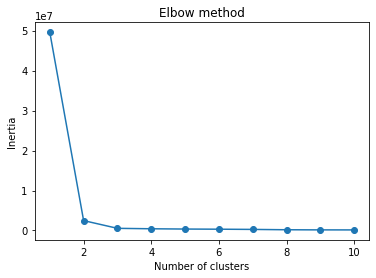

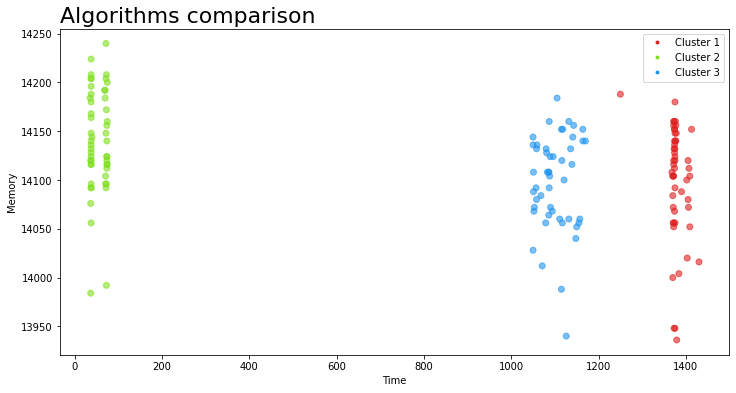

In [1]:
# Clustering com kmeans
# temos de fornever o valor de k (#clusters)
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt


file_name = '../measurements.csv'
df = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")

#Outliers treatment
#NOTE: This will remove 14*3*2 entries (14 languages, 3 sorting algorithms and 2 cases - best and worst executions)

# Agrupar o DataFrame por colunas "Language" e "Program"
grouped = df.groupby(['Language', 'Program'])

# Inicializar um DataFrame vazio para armazenar o resultado
df_removed_entries = pd.DataFrame()

# Iterar sobre cada grupo
for group_name, group_df in grouped:
    # Identificar o índice da melhor (menor tempo) e pior (maior tempo) entrada no grupo
    best_entry_index = group_df['Time'].idxmin()
    worst_entry_index = group_df['Time'].idxmax()
    
    # Remover as linhas com base nos índices encontrados e adicionar ao DataFrame resultante
    group_df = group_df.drop([best_entry_index, worst_entry_index])
    
    # Concatenar o DataFrame do grupo com o DataFrame resultante
    df_removed_entries = pd.concat([df_removed_entries, group_df])

df = df_removed_entries.copy()
# Imprimir o DataFrame resultante
print(df)



df_cluster1 = df[(df['Language'] == "Python Interpreted ") & (df['PowerLimit'] == 1000) &(df['Size']== 5000)]
df_cluster1 = df_cluster1[['Memory', 'Time']]

# preprocessa categoricos com one hot encoding
#df = pd.get_dummies(df_cluster1, columns=["Language", "Program"])  

# Determinar o número ideal de clusters usando o método do cotovelo
inertias = []
max_clusters = 10  # Número máximo de clusters a serem testados
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(df_cluster1)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(range(1, max_clusters+1), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

K_Clusters = 3  # Número ideal de clusters escolhido

# k-means
kmeans = KMeans(n_clusters=K_Clusters, random_state=0, n_init='auto')
# Obter clusters
df_cluster1['cluster'] = kmeans.fit_predict(df_cluster1)

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
# Adicionar os centróides ao dataframe
df_cluster1['cen_x'] = df_cluster1['cluster'].map(lambda x: cen_x[x])
df_cluster1['cen_y'] = df_cluster1['cluster'].map(lambda x: cen_y[x])
# Definir as cores dos clusters
colors = ['#DF2020', '#81DF20', '#2095F0']
df_cluster1['c'] = df_cluster1['cluster'].map(lambda x: colors[x])

plt.figure(figsize=(12,6))

column_1 = "Time"
column_2 = "Memory"

plt.scatter(df_cluster1[column_1], df_cluster1[column_2], c=df_cluster1.c, alpha=0.6)

# Criar a lista de elementos da legenda
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
                          markerfacecolor=mcolor, markersize=5) 
                   for i, mcolor in enumerate(colors)]

# Plotar a legenda
plt.legend(handles=legend_elements)

# Título e rótulos dos eixos
plt.title('Algorithms comparison', loc='left', fontsize=22)
plt.xlabel(f'{column_1}')
plt.ylabel(f'{column_2}')

plt.show()


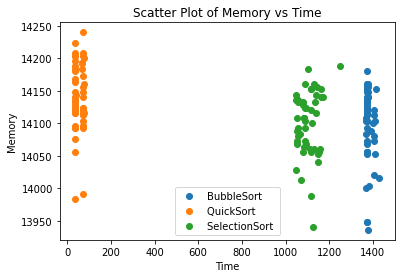

In [2]:
df_clusterResult = df[(df['Language'] == "Python Interpreted ") & (df['PowerLimit'] == 1000) &(df['Size']== 5000)]

df_clusterResult = df_clusterResult[['Program', 'Memory', 'Time']]

# Group the programs
grouped_data = df_clusterResult.groupby('Program')

# Create a scatter plot for each group
fig, ax = plt.subplots()

for program, group in grouped_data:
    ax.scatter(group['Time'], group['Memory'], label=program)


# Set plot labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Memory')
ax.set_title('Scatter Plot of Memory vs Time')

# Add a legend
ax.legend()

# Display the plot
plt.show()

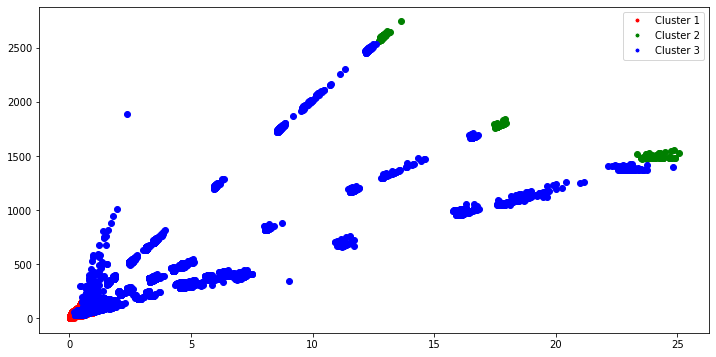

Cluster    Distribuição de Probabilidades
c=2  [0. 0. 1. 0.]
c=1  [9.64449361e-065 1.00000000e+000 1.99419526e-149 0.00000000e+000]
c=0  [1. 0. 0. 0.]
c=1  [9.49581116e-201 1.00000000e+000 0.00000000e+000 0.00000000e+000]
c=3  [0.00000000e+00 3.51885764e-15 0.00000000e+00 1.00000000e+00]
c=1  [2.23505478e-147 1.00000000e+000 0.00000000e+000 0.00000000e+000]
c=1  [2.65983538e-146 1.00000000e+000 1.41618492e-293 0.00000000e+000]
c=0  [1.00000000e+00 6.56099714e-25 0.00000000e+00 0.00000000e+00]
c=2  [0. 0. 1. 0.]
c=2  [1.54651023e-50 2.40723199e-03 9.97592768e-01 0.00000000e+00]
c=1  [1.36448361e-89 1.00000000e+00 1.78852132e-95 0.00000000e+00]
c=0  [9.99999997e-01 3.27183628e-09 0.00000000e+00 0.00000000e+00]
c=1  [7.13335843e-093 1.00000000e+000 4.22920428e-247 0.00000000e+000]
c=1  [0. 1. 0. 0.]
c=2  [1.51119693e-10 2.84126528e-35 1.00000000e+00 0.00000000e+00]
c=0  [1.00000000e+00 9.60610644e-38 0.00000000e+00 0.00000000e+00]
c=0  [1.00000000e+00 2.66593948e-48 0.00000000e+00 0.00000

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.mixture import GaussianMixture

# dataset
file_name = '../measurements.csv'
data = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")
data = data.drop(columns=['DRAM'])
data = data.drop(columns=['Language'])
data = data.drop(columns=['Program'])

# training gaussian mixture model 
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

# predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)

frame['cluster'] = labels
frame.columns = ["Cost", "PowerLimit", "Size", "Package", "Core", "GPU", "Time", "Temperature", "Memory", "cluster"]

colors = ['red', 'green', 'blue']

NUMBER_OF_CLUSTERS = 3

plt.figure(figsize=(12, 6))
for k in range(0, NUMBER_OF_CLUSTERS):
    data = frame[frame["cluster"] == k]
    plt.scatter(data["Package"], data["Time"], c=colors[k])

# create a list of legend elements
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label='Cluster {}'.format(i+1), 
                          markerfacecolor=mcolor, markersize=5) 
                   for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements)

plt.show()

# calcular probs dos casos por cluster
X = data[59:76]
X.columns = ["Cost", "PowerLimit", "Size", "Package", "Core", "GPU", "Time", "Temperature", "Memory", "cluster"]
X = X.drop(columns=['cluster'])

# imprime elementos, cluster e distribuição de probs
print("Cluster    Distribuição de Probabilidades")
a = gmm.fit_predict(X)
b = gmm.predict_proba(X)
i = 0
for x in a:
    print("c={}  {}".format(x, b[i]))
    i += 1


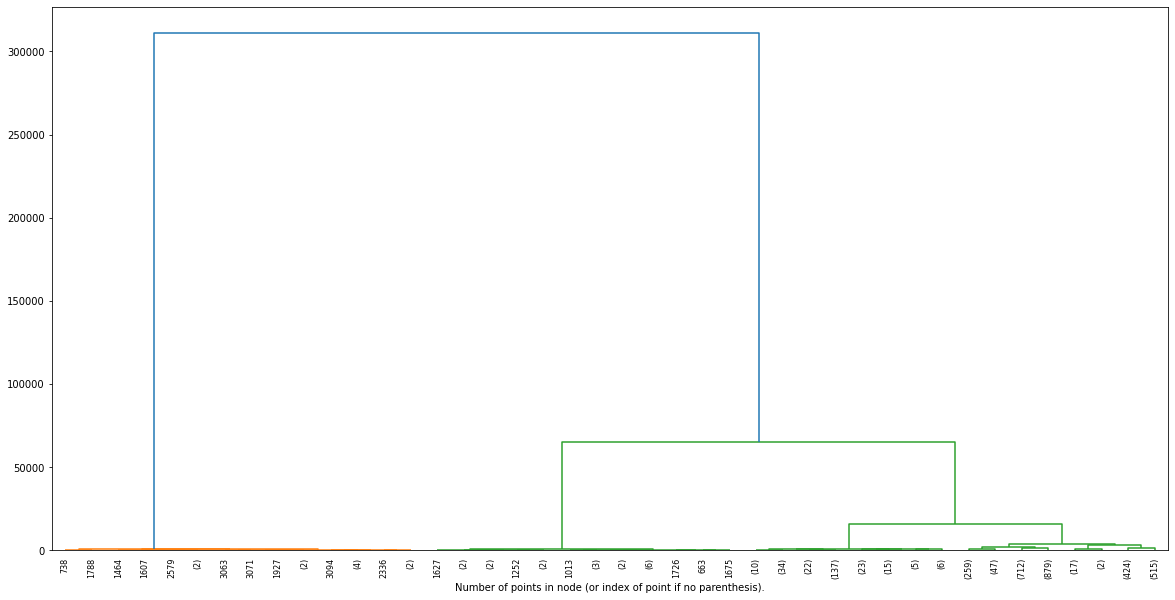

In [4]:
# Hierachical Clustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt

file_name = '../measurements.csv'
clustering_frame3 = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")

clustering_frame3 = clustering_frame3.drop(columns=['DRAM','Language','Program','Size'])

#print("num regs="+str(a.size/a.columns.size))

# Amostragem aleatória de 10% dos dados
sample_size = int(len(clustering_frame3) * 0.1)
random_indices = np.random.choice(len(clustering_frame3), size=sample_size, replace=False)
sample = clustering_frame3.iloc[random_indices]

link = linkage(sample, method='single', metric='euclidean')
plt.figure(figsize=(20, 10))
dendrogram(link, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

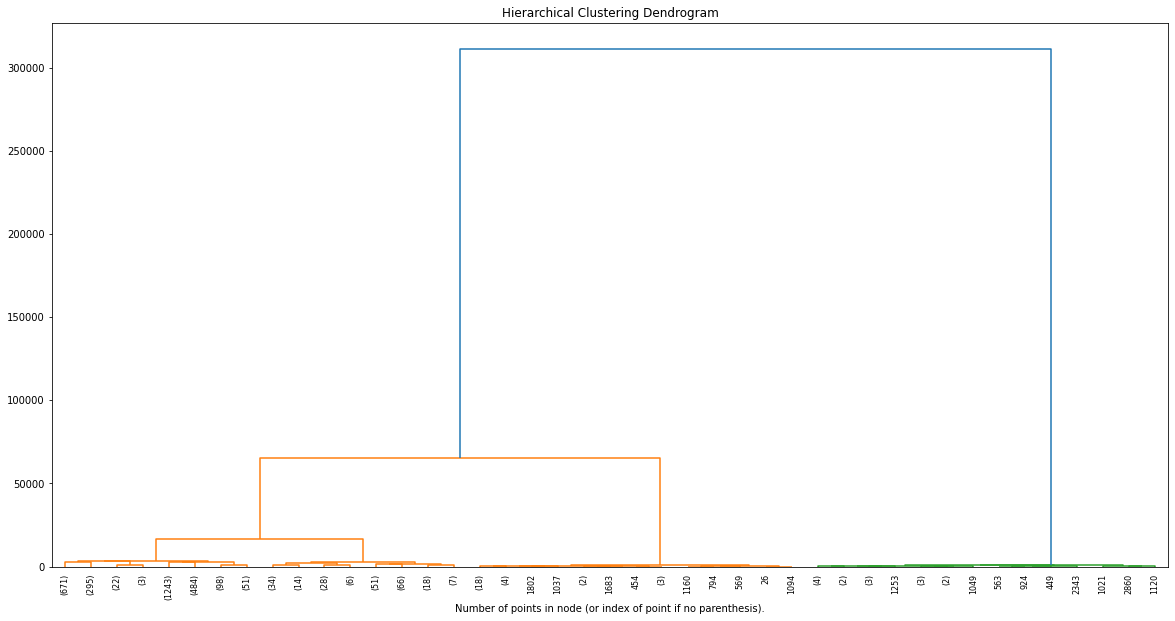

In [5]:
# Agglomerative Clustering (bottom-up construction)

import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# Carrega o arquivo de dados
file_name = '../measurements.csv'
a = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")
a = a.drop(columns=['DRAM'])
a = a.drop(columns=['Language'])
a = a.drop(columns=['Program'])

# Amostragem aleatória de 10% dos dados
sample_size = int(len(a) * 0.1)
random_indices = np.random.choice(len(a), size=sample_size, replace=False)
a_sample = a.iloc[random_indices]

# Executa o clustering hierárquico na amostra
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single', metric='euclidean')
model.fit(a_sample)

# Plota o dendrograma
plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()